The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
diabetes = pd.read_csv('/content/diabetes_prediction_dataset.csv')
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
diabetes.shape

(100000, 9)

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
diabetes.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
diabetes.duplicated().sum()

0

In [ ]:
diabetes.drop_duplicates(inplace=True)
diabetes.duplicated().sum()

0

In [ ]:
diabetes.replace("Other", np.nan, inplace=True)
diabetes.dropna(inplace=True)

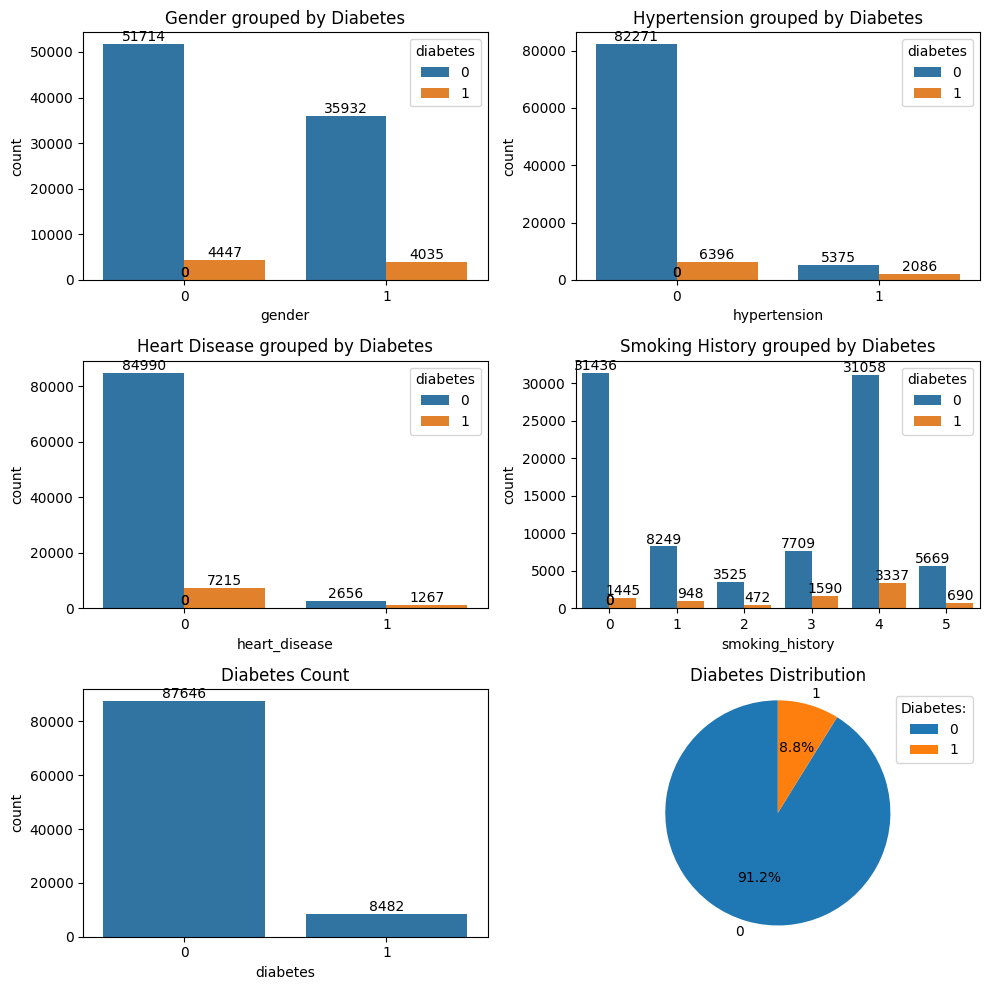

In [ ]:
# Function to add counts on bars
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# Plot gender grouped by diabetes
ax = sns.countplot(ax=axes[0, 0], x='gender', hue='diabetes', data=diabetes)
axes[0, 0].set_title('Gender grouped by Diabetes')
add_counts(ax)

# Plot hypertension grouped by diabetes
ax = sns.countplot(ax=axes[0, 1], x='hypertension', hue='diabetes', data=diabetes)
axes[0, 1].set_title('Hypertension grouped by Diabetes')
add_counts(ax)

# Plot heart disease grouped by diabetes
ax = sns.countplot(ax=axes[1, 0], x='heart_disease', hue='diabetes', data=diabetes)
axes[1, 0].set_title('Heart Disease grouped by Diabetes')
add_counts(ax)

# Plot smoking history grouped by diabetes
ax = sns.countplot(ax=axes[1, 1], x='smoking_history', hue='diabetes', data=diabetes)
axes[1, 1].set_title('Smoking History grouped by Diabetes')
add_counts(ax)

# Plot diabetes
ax = sns.countplot(ax=axes[2, 0], x='diabetes', data=diabetes)
axes[2, 0].set_title('Diabetes Count')
add_counts(ax)

# Create pie plot for diabetes
diabetes_counts = diabetes['diabetes'].value_counts()
axes[2, 1].pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90)
axes[2, 1].set_title('Diabetes Distribution')
axes[2, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[2, 1].legend(title='Diabetes:', loc='upper right')
# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
hypertension_patients = diabetes[diabetes["hypertension"] == 1]
probability = hypertension_patients["diabetes"].mean()
print(probability)

0.27958718670419513


In [ ]:
# to check for imbalance
diabetes["diabetes"].value_counts()

,count
diabetes,
0,87646
1,8482


<Axes: xlabel='diabetes', ylabel='hypertension'>

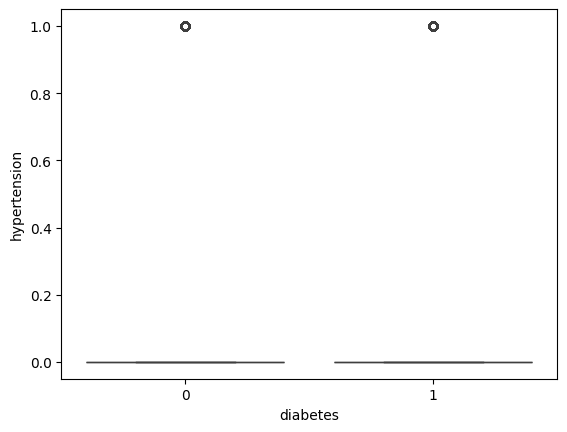

In [ ]:
sns.boxplot(x="diabetes",y="hypertension",data=diabetes)
# to check outliers

<Axes: >

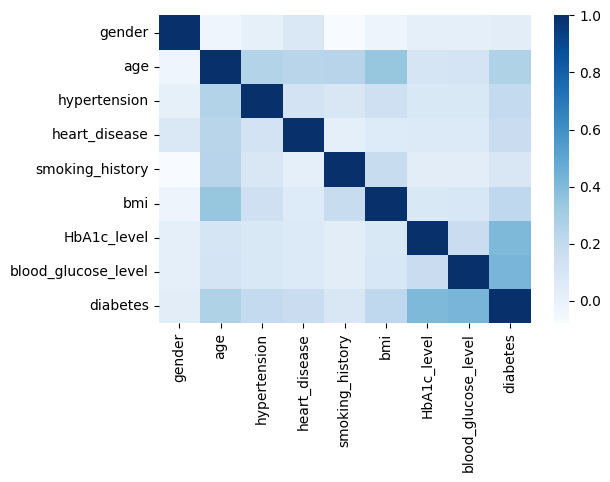

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(diabetes.corr(),cmap='Blues') # use a period to call the heatmap function from the sns library


In [ ]:
# Convert categorical data to numerical data using lebel encoding
from sklearn import preprocessing
lebel = preprocessing.LabelEncoder()


In [ ]:
diabetes_enc= diabetes.select_dtypes(include=['object']).columns
for column in diabetes_enc: # Convert Categorical Data to Numerical
    diabetes[column] = lebel.fit_transform(diabetes[column]) # Use lebel instead of Label
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
diabetes.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.028670,0.014196,0.078512,-0.079574,-0.023490,0.019928,0.017831,0.037837
age,-0.028670,1.000000,0.257297,0.238449,0.241234,0.344779,0.106708,0.114323,0.264918
hypertension,0.014196,0.257297,1.000000,0.119972,0.087928,0.148124,0.081443,0.084841,0.195696
heart_disease,0.078512,0.238449,0.119972,1.000000,0.023627,0.061382,0.068142,0.070838,0.170701
smoking_history,-0.079574,0.241234,0.087928,0.023627,1.000000,0.183883,0.035458,0.038329,0.088509
bmi,-0.023490,0.344779,0.148124,0.061382,0.183883,1.000000,0.084443,0.092593,0.214951
HbA1c_level,0.019928,0.106708,0.081443,0.068142,0.035458,0.084443,1.000000,0.171717,0.406446
blood_glucose_level,0.017831,0.114323,0.084841,0.070838,0.038329,0.092593,0.171717,1.000000,0.424366
diabetes,0.037837,0.264918,0.195696,0.170701,0.088509,0.214951,0.406446,0.424366,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Selecting features and target variable
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
x = diabetes[features]
y = diabetes['diabetes']


In [ ]:
#Split Dataset into Training and Test Sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=45)

In [ ]:
# Standardizing the features
# Standardize data to avoid high variations in the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [ ]:
# Apply SMOTE to the training data only
smote = SMOTE(random_state=45)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


In [ ]:
model = LogisticRegression() # Instantiate model
model.fit(x_train, y_train) # Fit or train model with train dataset using X_train

LogisticRegression()

In [ ]:
#fitting our model
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluating our model
print("score:{} ".format(accuracy_score(y_test, y_pred)))
print("matrix:{}".format(confusion_matrix(y_test, y_pred)))
print("report:{} ".format(classification_report(y_test, y_pred)))


score:0.9602621450119629 
matrix:[[17410   138]
 [  626  1052]]
report:              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17548
           1       0.88      0.63      0.73      1678

    accuracy                           0.96     19226
   macro avg       0.92      0.81      0.86     19226
weighted avg       0.96      0.96      0.96     19226
 


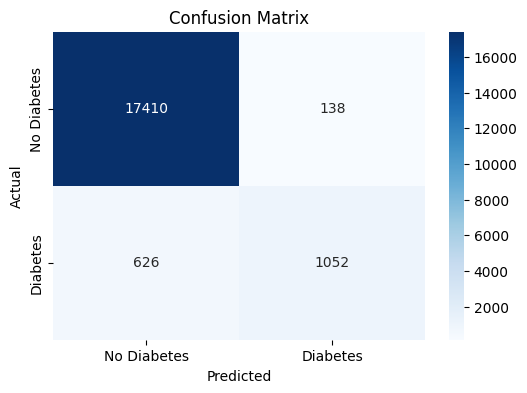

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import pickle

# Save the model
with open('Diabetes_model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
# Prepare custom data
custom_data = [
    [1, 45, 0, 0, 1, 25.6, 6.5, 110],
    [0, 35, 1, 0, 0, 28.2, 7.2, 130],
    [1, 55, 1, 1, 1, 31.4, 8.0, 150],
    [0, 42, 0, 1, 0, 26.9, 7.0, 120],
    [1, 50, 1, 0, 1, 29.7, 7.8, 140]
]

# Convert to pandas DataFrame
custom_df = pd.DataFrame(custom_data, columns=features)

# Standardize the custom data
custom_X = scaler.transform(custom_df[features])

# Use the fitted model object (`model`) to predict on the custom data
custom_predictions = model.predict(custom_X) # Changed from LogisticRegression.transform(custom_X)

# Print the predictions
for i, pred in enumerate(custom_predictions):
    if pred == 0:
        print(f"Person {i+1} is not predicted to have diabetes.")
    else:
        print(f"Person {i+1} is predicted to have diabetes.")

Person 1 is not predicted to have diabetes.
Person 2 is not predicted to have diabetes.
Person 3 is not predicted to have diabetes.
Person 4 is not predicted to have diabetes.
Person 5 is not predicted to have diabetes.


Summary of the Analysis:

A prediction model was developed to identify individuals with diabetes. The model LogictisRegression achieved a high accuracy of 96%, correctly classifying the majority of individuals. And, the model's sensitivity in detecting individuals with diabetes was lower (63% recall). This suggests that while the model is good at identifying those without diabetes.